In [1]:
from binance.client import Client as bnb_client
from datetime import datetime
import pandas as pd 
import numpy as np 

client = bnb_client(tld='US')

def get_binance_px(symbol,freq,start_ts = '2019-01-01'):
    data = client.get_historical_klines(symbol,freq,start_ts)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
    'num_trades','taker_base_volume','taker_quote_volume','ignore']

    data = pd.DataFrame(data,columns = columns)
    
    # Convert from POSIX timestamp (number of millisecond since jan 1, 1970)
    data['open_time'] = data['open_time'].map(lambda x: datetime.utcfromtimestamp(x/1000))
    data['close_time'] = data['close_time'].map(lambda x: datetime.utcfromtimestamp(x/1000))
    return data 

univ = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT','DOTUSDT','MATICUSDT']

freq = '1h'
px = {}
for x in univ:
    data = get_binance_px(x,freq)
    px[x] = data.set_index('open_time')['close']

px = pd.DataFrame(px).astype(float)
px = px.reindex(pd.date_range(px.index[0],px.index[-1],freq=freq))
ret = px.pct_change()

C:\Users\mroha\AppData\Local\Temp\ipykernel_28840\3516647557.py:9: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  data = client.get_historical_klines(symbol,freq,start_ts)
C:\Users\mroha\AppData\Local\Temp\ipykernel_28840\3516647557.py:16: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  data['open_time'] = data['open_time'].map(lambda x: datetime.utcfromtimestamp(x/1000))
C:\Users\mroha\AppData\Local\Temp\ipykernel_28840\3516647557.py:17: DeprecationWarning: datetime.datetime.utcfromtim

In [3]:
ret

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT
2019-09-23 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-23 09:00:00,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
2019-09-23 10:00:00,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
2019-09-23 11:00:00,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
2019-09-23 12:00:00,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...
2025-08-26 23:00:00,-0.001022,0.001372,0.000000,-0.002312,-0.000166,-0.004618,0.0
2025-08-27 00:00:00,-0.003101,-0.007000,-0.006467,0.002770,-0.009027,-0.001289,0.0
2025-08-27 01:00:00,-0.002705,-0.003399,0.002092,-0.006957,0.004789,0.006968,0.0
2025-08-27 02:00:00,-0.000101,0.005325,0.003132,0.003852,-0.001833,0.000000,0.0


In [2]:
# standard rank-demean-normalized portfolio
hor = 1
port = (-1.0*ret.rolling(hor,min_periods=1).mean()).rank(1)
port = port.subtract(port.mean(1),0)
port = port.divide(port.abs().sum(1),0)
port

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT
2019-09-23 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-23 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-23 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-23 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-23 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2025-08-26 23:00:00,0.083333,-0.250000,-0.125000,0.166667,0.000000,0.250000,-0.125000
2025-08-27 00:00:00,0.000000,0.166667,0.083333,-0.250000,0.250000,-0.083333,-0.166667
2025-08-27 01:00:00,0.083333,0.166667,-0.083333,0.250000,-0.166667,-0.250000,0.000000
2025-08-27 02:00:00,0.166667,-0.250000,-0.083333,-0.166667,0.250000,0.041667,0.041667


In [4]:
# compute turnover
to = (port.fillna(0) - port.shift().fillna(0)).abs().sum(1)
to

2019-09-23 08:00:00    0.000000
2019-09-23 09:00:00    0.000000
2019-09-23 10:00:00    0.000000
2019-09-23 11:00:00    0.000000
2019-09-23 12:00:00    0.000000
                         ...   
2025-08-26 23:00:00    2.000000
2025-08-27 00:00:00    1.750000
2025-08-27 01:00:00    1.500000
2025-08-27 02:00:00    1.666667
2025-08-27 03:00:00    1.916667
Freq: h, Length: 51956, dtype: float64

<Axes: >

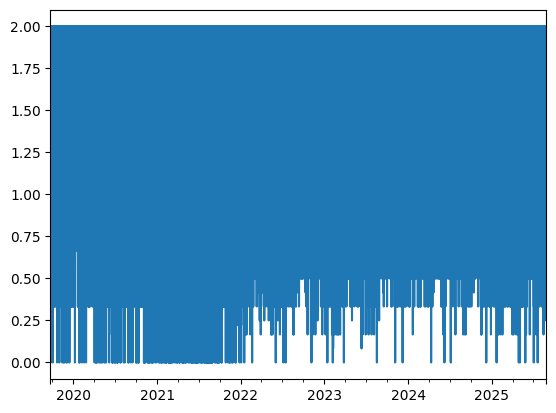

In [5]:
# plot turnover
to.plot()

In [6]:
# average turnover
to.mean()

np.float64(1.4007015551620603)

In [7]:
# gross of tcost returns
gross_ret = (port.shift()*ret).sum(1)

In [8]:
gross_ret.mean() / gross_ret.std() * np.sqrt(24*365)

np.float64(9.890920859850922)

In [10]:
# net of tcost returns
tcost_bps = 20 # (comissions + slip)
net_ret = gross_ret.subtract(to*tcost_bps*1e-4,fill_value=0)

In [11]:
net_ret.mean() / net_ret.std() * np.sqrt(24*365)

np.float64(-61.28481649237927)

### Happens when frequency is too high and your are a big firm, so you may want to slow it down to reduce the tcosts_bps to get sharpe up